In [1]:
import tensorflow as tf
import numpy as np
import sys


In [3]:
from magenta.models.rl_tuner import rl_tuner
from magenta.models.rl_tuner import rl_tuner_ops

In [ ]:
# Place to save your model checkpoints and compositions
SAVE_PATH = "/tmp/rl_tuner/"

In [5]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [6]:
rl_tuner_hparams = tf.contrib.training.HParams(random_action_probability=0.1,
                                               store_every_nth=1,
                                               train_every_nth=5,
                                               minibatch_size=32,
                                               discount_rate=0.5,
                                               max_experience=100000,
                                               target_network_update_rate=0.01)

## Train network

In [7]:
reload(rl_tuner_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [8]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.



Successfully initialized internal nets from checkpoint!


Generated sequence: [0, 23, 0, 23, 0, 0, 0, 18, 0, 0, 0, 18, 0, 18, 0, 0, 0, 18, 0, 18, 0, 22, 0, 0, 0, 23, 0, 0, 0, 23, 0, 18]


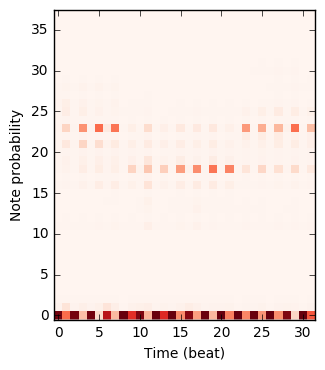

In [9]:
# Generate initial music sequence before training with RL
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=32)

In [12]:
rl_net.train(num_steps=1000000, exploration_period=500000)

Evaluating initial model...
Evaluating model...
Training iteration 50000
	Reward for last 50000 steps: -271440.762102
		Music theory reward: -19212.4007021
		Note RNN reward: -252228.3614
	Exploration probability is 0.9042382
Evaluating model...
Training iteration 100000
	Reward for last 50000 steps: -252624.961234
		Music theory reward: -8962.16737395
		Note RNN reward: -243662.79386
	Exploration probability is 0.8084782
Evaluating model...
Training iteration 150000
	Reward for last 50000 steps: -231745.239523
		Music theory reward: 1347.95386468
		Note RNN reward: -233093.193388
	Exploration probability is 0.7127182
Evaluating model...
Training iteration 200000
	Reward for last 50000 steps: -215197.618369
		Music theory reward: 3926.74782733
		Note RNN reward: -219124.366196
	Exploration probability is 0.6169582
Evaluating model...
Training iteration 250000
	Reward for last 50000 steps: -195172.008609
		Music theory reward: 8494.54816083
		Note RNN reward: -203666.556769
	Exploration

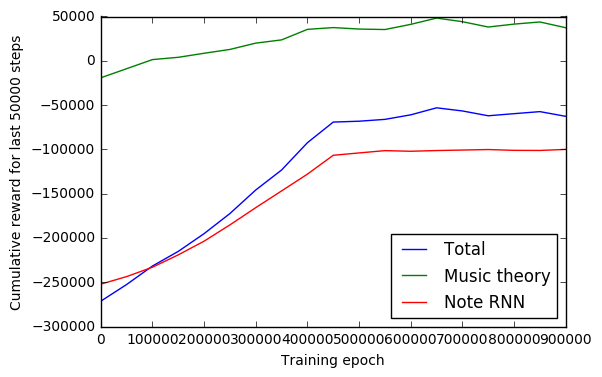

In [13]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

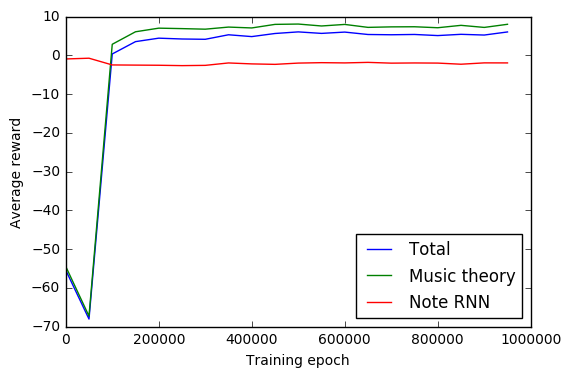

In [14]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

Generated sequence: [0, 0, 1, 23, 0, 23, 26, 0, 23, 25, 0, 26, 0, 0, 1, 30, 0, 23, 26, 0, 33, 0, 28, 26, 0, 0, 21, 0, 0, 26, 0, 0]


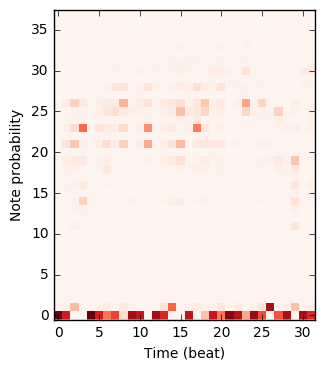

In [15]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl')

In [16]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'my_cool_model')

In [17]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 5.0
	Compositions with unique highest note:63.0
	Compositions with unique lowest note:63.0
	Number of resolved leaps:47.0
	Number of double leaps:28.0
	Notes not in key:58.0
	Notes in motif:2113.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.05
	Percent compositions with unique highest note:0.63
	Percent compositions with unique lowest note:0.63
	Percent of leaps resolved:0.626666666667
	Percent notes not in key:0.018125
	Percent notes in motif:0.6603125
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.331231351539
	Average autocorrelation of lag2:0.108201559
	Average autocorrelation of lag3:-0.0560363994806

	Avg. num octave jumps per composition:0.02
	Avg. num sevenths per composition:0.03
	Avg. num fifths per composition:0.56
	Avg. num sixths per composition:0.36
	Avg. num fourths